In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df=pd.read_csv('IRIS.csv')

In [27]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
## missing values
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [30]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [31]:
df[df.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [32]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [35]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [36]:
df["sepal_length"]=df["sepal_length"].round(3)

In [38]:
df["sepal_length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [39]:
df["sepal_width"]=df["sepal_width"].round(3)
df["petal_length"]=df["petal_length"].round(3)
df["petal_width"]=df["petal_width"].round(3)

In [40]:
df["petal_length"]

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [54]:
num_data=[]
obj_data=[]

for column in df.columns:
    if df.dtypes[column] != 'object':
        num_data.append(column)
    else:
        obj_data.append(column)  

In [50]:
num_data

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [55]:
obj_data

['species']

## Find Outliers

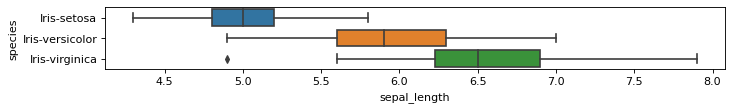

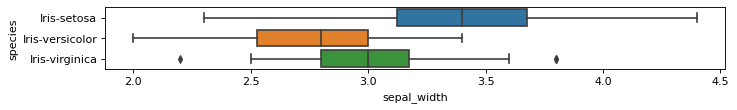

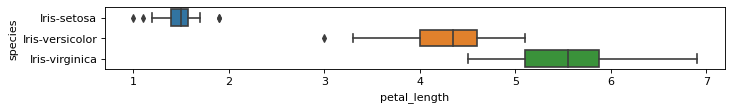

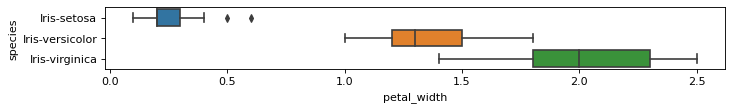

In [57]:
for i in range(0,len(num_data)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x = df[num_data[i]], y=df['species'], data = df,orient="h")
    plt.show()

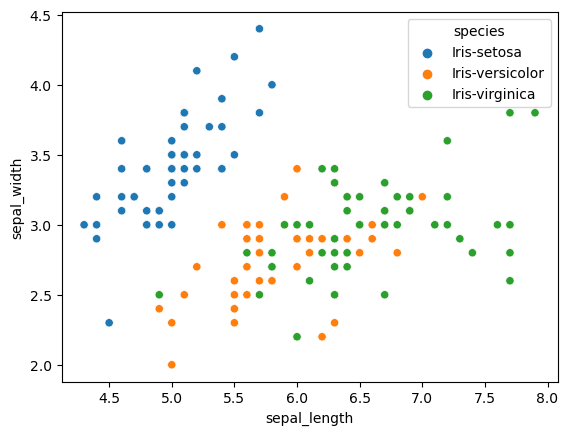

In [60]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

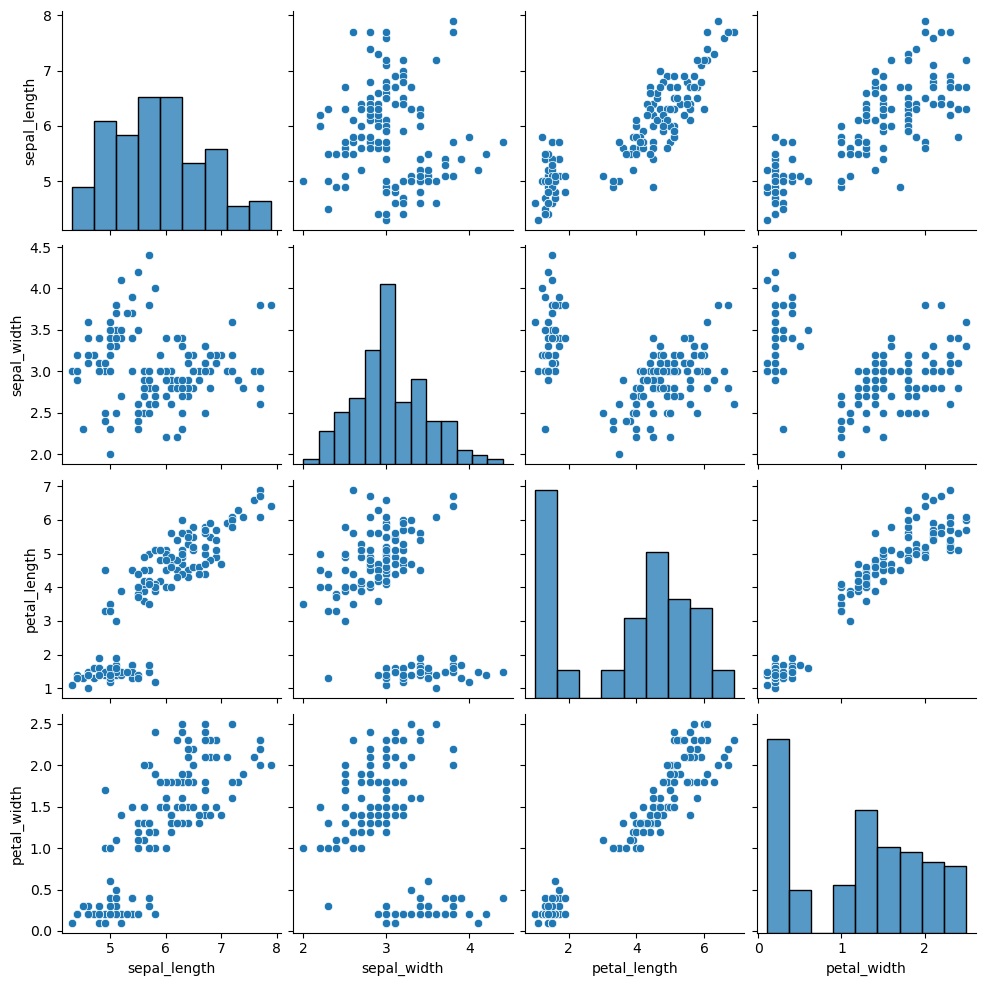

In [61]:
sns.pairplot(df)

<AxesSubplot: xlabel='petal_length', ylabel='Count'>

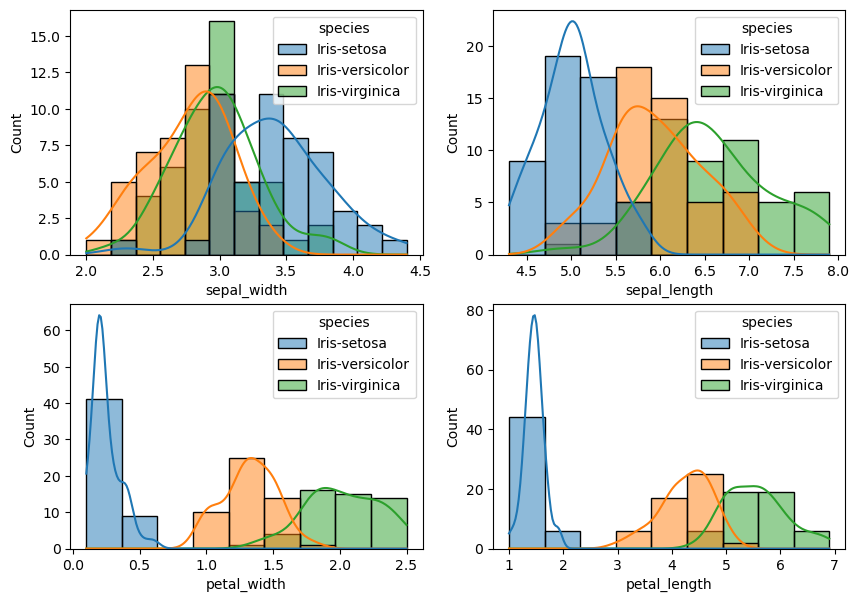

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(10,7))
sns.histplot(ax = axes[0,0],data=df,x ='sepal_width',hue='species',kde=True)
sns.histplot(ax = axes[0,1],data=df,x ='sepal_length',hue='species',kde=True)
sns.histplot(ax = axes[1,0],data=df,x ='petal_width',hue='species',kde=True)
sns.histplot(ax = axes[1,1],data=df,x ='petal_length',hue='species',kde=True)

/tmp/ipykernel_827/660786042.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

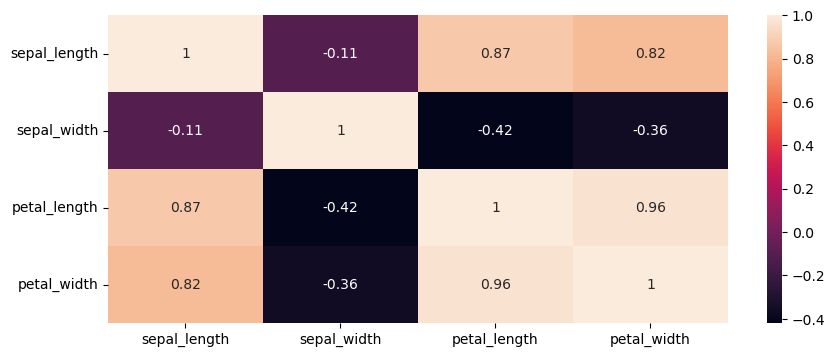

In [63]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)
plt.show

## Split Data

In [64]:
X = df.drop(['species',"sepal_width"],axis=1)
y = df['species']

In [65]:
X,y

(     sepal_length  petal_length  petal_width
 0             5.1           1.4          0.2
 1             4.9           1.4          0.2
 2             4.7           1.3          0.2
 3             4.6           1.5          0.2
 4             5.0           1.4          0.2
 ..            ...           ...          ...
 145           6.7           5.2          2.3
 146           6.3           5.0          1.9
 147           6.5           5.2          2.0
 148           6.2           5.4          2.3
 149           5.9           5.1          1.8
 
 [150 rows x 3 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: species, Length: 150, dtype: object)

# Scalling

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [69]:
scaler_x=scaler.fit_transform(X)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn import metrics

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
RF = RandomForestClassifier(n_estimators=100, random_state=42)  
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

1.0
1.0


In [84]:
y_pred_rf=RF.predict(X_test)
y_pred_rf

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [85]:
report = classification_report(y_test, y_pred_rf)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [86]:
df=pd.DataFrame({"y_pred_rf":y_pred_rf,"y_test":y_test})
df

,y_pred_rf,y_test
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor
